In [12]:
import os
# os.environ['R_HOME'] = '/usr/lib/R'
# os.environ['R_HOME'] = r'C:\Program Files\R\R-4.3.1\bin'
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.3.1'
# os.environ['R_USER'] = r'C:\Users\Student\anaconda3\envs\general\Lib\site-packages\rpy2'

import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr, data
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc, rcParams
import matplotlib.dates as mdates

In [2]:
base = importr('base')
rict = importr('rict')

In [3]:
pd_df = pd.read_csv('new-input-file-data-to-use-multi-year-1.txt')
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df = ro.conversion.py2rpy(pd_df)

In [4]:
result = rict.rict(r_from_pd_df, year_type="multi", store_eqrs=True, seed=True)

R[write to console]: Variables for the 'physical' model detected - applying relevant checks. 

R[write to console]: Grid reference values detected for 'GB' - applying relevant checks.

R[write to console]: Success, all validation checks passed!

R[write to console]: Classifying...



In [5]:
result

ID,SITE,YEAR,EQR,EQR Metrics
...,...,...,...,...


In [6]:
with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_r_df = ro.conversion.rpy2py(result)

pd_from_r_df

,ID,SITE,YEAR,EQR,EQR Metrics
1,1,MYR-GB-01-R,2016,0.945434,AVG_ASPT
2,1,MYR-GB-01-R,2016,0.972966,AVG_ASPT
3,1,MYR-GB-01-R,2016,0.982756,AVG_ASPT
4,1,MYR-GB-01-R,2016,0.944572,AVG_ASPT
5,1,MYR-GB-01-R,2016,0.936237,AVG_ASPT
...,...,...,...,...,...
300026,10,MYR-GB-12-D,2016,5.000000,MINTA
300027,10,MYR-GB-12-D,2016,5.000000,MINTA
300028,10,MYR-GB-12-D,2016,NaN,ALL_SEASONS_ASPT
300029,10,MYR-GB-12-D,2016,NaN,ALL_SEASONS_NTAXA


In [7]:
pd_from_r_df.keys

<bound method NDFrame.keys of         ID         SITE  YEAR       EQR        EQR Metrics
1        1  MYR-GB-01-R  2016  0.945434           AVG_ASPT
2        1  MYR-GB-01-R  2016  0.972966           AVG_ASPT
3        1  MYR-GB-01-R  2016  0.982756           AVG_ASPT
4        1  MYR-GB-01-R  2016  0.944572           AVG_ASPT
5        1  MYR-GB-01-R  2016  0.936237           AVG_ASPT
...     ..          ...   ...       ...                ...
300026  10  MYR-GB-12-D  2016  5.000000              MINTA
300027  10  MYR-GB-12-D  2016  5.000000              MINTA
300028  10  MYR-GB-12-D  2016       NaN   ALL_SEASONS_ASPT
300029  10  MYR-GB-12-D  2016       NaN  ALL_SEASONS_NTAXA
300030  10  MYR-GB-12-D  2016       NaN  ALL_SEASONS_MINTA

[300030 rows x 5 columns]>

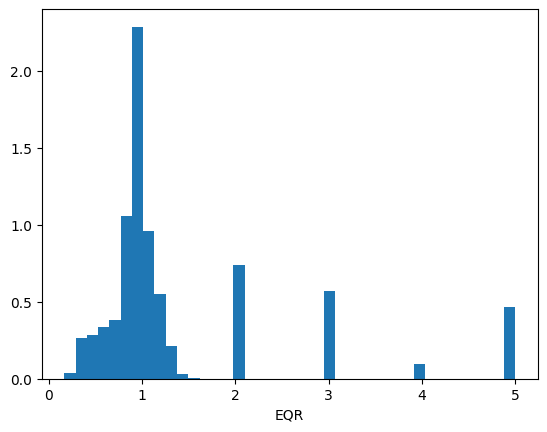

In [19]:
plt.hist(pd_from_r_df['EQR'], density=True, bins=40)
plt.xlabel("EQR")

plt.show()